# Analysis of Flight Delay at SeaTac Airport

### Summary
Flight delays are a significant source of frustration for travelers, airlines, and airport administrators which cause missed connections, wasted hours, and economic losses. By analyzing historical flight data, we can identify which airports and carriers systematically experience the longest delays. This knowledge can help travelers make more informed booking decisions, while potentially guiding airlines and airports on where to direct resources or improve operational efficiency.
Moreover, weather is often cited as one of the biggest contributors to delayed flights. Seattle, in particular, is known for its rainy climate, which may challenge both airport infrastructure and airline scheduling. Understanding exactly which weather conditions lead to disruptions can improve short-term scheduling (e.g., proactive delays or cancellations) and long-term planning (e.g., upgrading de-icing equipment, improving runway drainage). 
Finally, if a reliable predictive model can forecast delay likelihood based on weather forecasts and past data, it could help airlines adjust flight schedules more dynamically and allow passengers to plan ahead. Thus, this leads to fewer surprises, reduced costs, and a more efficient air travel experience overall.

### 1. Which airports in the US experience the most and least average flight delays?
We plan to analyze flight data from 2022 - 2024 to identify airports that have the greatest average delay minutes and the highest percentage of delayed flights. Understanding these busiest or most delay-prone airports can guide our subsequent analyses on airline performance and weather impacts.

### 2. Which airlines tend to have longer delays, and how does their on-time performance vary by month?
By grouping flights by carrier, we will compare each airline’s average departure delay and proportion of heavily delayed flights. We also want to see if these patterns change seasonally.

### 3. How do local weather factors at Seattle-Tacoma International Airport (SEA) correlate with flight delays, and which conditions have the greatest impact?
We plan to gather weather data (e.g., precipitation, wind speed, visibility) for SEA over the same time range. We will analyze how each factor relates to changes in average departure times or total cancellations.

### 4. Can we predict future flight delays at SEA using historical flight data and weather conditions?
We will build a model such as a linear regression or classification approach to estimate whether an upcoming flight will be delayed. Our focus is on using real-world weather features (rainfall, temperature, wind) and past delay patterns to gauge how reliably we can forecast delays in advance.

## Challenge Goals

### Multiple Datasets:
We plan to combine at least two datasets: (1) the BTS flight-delay records, (2) NOAA weather data for Seattle. By merging and comparing these datasets, at least two of our research questions will rely on data from more than one source. For instance, analyzing the relationship between adverse weather days and delay times. This satisfies the requirement for using multiple datasets with at least one join/merge operation.


### Advanced Machine Learning:
Our main project goal is to predict future flight delays. We plan to systematically compare three different machine-learning algorithms in scikit-learn such as Random Forest, XGBoost, and a Neural Network (or another advanced algorithm) and tune their hyperparameters (e.g., n_estimators, max_depth, etc.). By quantifying and comparing their performance with metrics such as accuracy or mean absolute error, we meet the requirement of applying advanced ML techniques beyond a single basic model.


### New Library:
We will create interactive visualizations using Plotly (or Altair, if preferred). This goes beyond basic static plotting libraries like matplotlib or seaborn taught in class, and allows us to build dynamic charts where a user can hover over data points to see exact values, filter by airline, or zoom into specific date ranges. This library will be central to communicating our findings, making it a substantial part of the project rather than a minor addition.

## Collaboration and Conduct

Students are expected to follow Washington state law on the [Student Conduct Code for the University of Washington](https://www.washington.edu/admin/rules/policies/WAC/478-121TOC.html). In this course, students must:

- Indicate on your submission any assistance received, including materials distributed in this course.
- Not receive, generate, or otherwise acquire any substantial portion or walkthrough to an assessment.
- Not aid, assist, attempt, or tolerate prohibited academic conduct in others.

Update the following code cell to include your name and list your sources. If you used any kind of computer technology to help prepare your assessment submission, include the queries and/or prompts. Submitted work that is not consistent with sources may be subject to the student conduct process.

In [1]:
your_name = "Kazuki Fujita, Dilshan Bedi, Xiangcheng Ji"
sources = [
    "https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/",
    "https://plotly.com/python/",
    "https://plotly.com/python/bar-charts/",
    "https://www.geeksforgeeks.org/get-n-largest-values-from-a-particular-column-in-pandas-dataframe/",
    "https://stackoverflow.com/questions/40045632/adding-a-column-in-pandas-df-using-a-function",
    "https://seaborn.pydata.org/tutorial/data_structure.html#long-form-vs-wide-form-data",
    "https://www.machinelearningplus.com/plots/python-scatter-plot/",
    "https://seaborn.pydata.org/generated/seaborn.histplot.html",
    
    "Machine learning:",
    "https://scikit-learn.org/stable/user_guide.html",
    "https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression",
    "https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html",
    "https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html",
    "https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html",
    "https://imbalanced-learn.org/stable/",
    "https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html",
    "Show me how to implement a Logistic Regression model in Python for a binary classification problem, including code to output a confusion matrix and classification report.",
    "How do I build a Random Forest classifier with class_weight set to 'balanced' in scikit-learn, and what is the expected impact on imbalanced data?",
    "Could you generate an example code snippet that splits my dataset into training and testing sets using stratified sampling with scikit-learn's train_test_split?",
    "What is the process for using SMOTE (Synthetic Minority Oversampling Technique) with the imbalanced-learn library in Python",
    "Can you provide a comparison example of using class weighting versus SMOTE for handling imbalanced datasets in a classification task?", 
]

assert your_name != "", "your_name cannot be empty"
assert ... not in sources, "sources should not include the placeholder ellipsis"
assert len(sources) >= 6, "must include at least 6 sources, inclusive of lectures and sections"

## Data Setting and Methods

For this project, we plan to use two primary sources of data:
U.S. Flight Delays Data
U.S. Bureau of Transportation Statistics (BTS) TranStats, which provides on-time performance data for domestic flights
https://www.transtats.bts.gov/DL_SelectFields.aspx?gnoyr_VQ=FGJ&QO_fu146_anzr=b0-gvzr
This dataset contains flight-level records including carrier code, origin airport, destination airport, scheduled departure/arrival times, actual departure/arrival times, and delay minutes attributed to various causes (weather, carrier, etc.). The data can span multiple months or years, allowing us to look at patterns over time.


Seattle Airport (SEA) Weather Data
We plan to obtain historical weather observations from the National Oceanic and Atmospheric Administration (NOAA) 
https://www.ncdc.noaa.gov/cdo-web/review
This dataset includes daily or hourly observations of precipitation, temperature, wind speed, and other weather variables specifically at or near Seattle-Tacoma International Airport.


3 ways the context of the dataset might complicate or deepen your analysis:

Granularity and Time Alignment
While flight-delay data is typically reported at the level of individual flights (with specific departure/arrival timestamps), weather data may be hourly or daily averages. This mismatch in granularity means we need to decide how to combine the two datasets—for example, do we pair each flight with the nearest hour’s weather observation or a daily summary? Choices here can introduce noise or bias.

Missing or Incomplete Records
Even though the BTS data is robust, certain flights may have missing delay causes or incomplete timestamp fields. Similarly, NOAA weather stations can occasionally have gaps in recording. If there are blocks of time when the weather station didn’t capture wind speed or precipitation, we’ll need to handle these missing values carefully (e.g., interpolation, imputation, or excluding certain records).

Localized vs. Systemic Factors
Flight delays can be caused by factors beyond just local Seattle weather—such as weather at the plane’s origin airport or national air-traffic control issues. If we rely solely on SEA-based weather, we might incorrectly attribute a delay to local conditions when in reality the flight was held up by a storm at its previous stop. Conversely, if we try to factor in multiple airports’ weather, our analysis becomes more complex. 
We need to define boundaries: do we only focus on how SEA weather impacts SEA-origin flights, or do we incorporate bigger network effects?


In [2]:
!pip install scikit-learn
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy
!pip install -q folium mapclassify
!pip install os
!pip install plotly
!pip install nbformat


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement os (from versions: none)

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
ERROR: No matching distribution found for os

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip i

In [3]:
import sklearn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import doctest
import os as os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve

sns.set_theme()
import plotly.express as px

In [4]:
flight_folder = "Dataset/Flights"
combined_df = []

for csv_file in os.scandir(flight_folder):
  df = pd.read_csv(csv_file.path)
  combined_df.append(df)

# Merged all flight csv files
merged_flights = pd.concat(combined_df)



#DelayData = pd.read_csv("Dataset/DELAY_REPORTING_2023_1.csv")


weather_data = pd.read_csv("Dataset/Weather/Weather_SEA_2023_2024.csv")
#print(WeatherData)



## Results

*Replace this text with your results. This section tends to be one of the longer sections of the notebook. Be sure to create new code cells and new Markdown text cells with additional subheadings to explain and break-up longer snippets of code into a more readable format.*

1. *Present and discuss your research results. Treat each of your research questions separately. Include additional discussions for results that are most interesting, surprising, or important.*
2. *Interpret the results. If the answers are unexpected, try to offer an explanation. A good report not only presents the results, but also provides an argument or interpretation based on the data analysis.*
3. *Include any visualizations you have made. In general, these should be generated by your Python code. If you plotted by hand or other software, explain why it was not possible to create the plot you wanted in Python and what you tried.*

*As with assessments, documentation and testing are required. Automated tests must be written in Python using small, manually-verifiable data.*

### 1. Which airports in the US experience the most and least average flight delays?

We were initially interested in finding out the airports with the most delay, but after noticing some outliers, decided to take a look at the least delays also. As the result of the first graph show, most airports have quite a bit of a delay. The first graph compares the delays of 90 airports in the US.

The second graph shows the top 5 airports with the most delay:
1. MIA - Miami International Airport
2. FLL - Fort Lauderdale-Hollywood International Airport
3. EWR - Newark Liberty International Airport
4. CLT - Charlotte Douglas International Airport
5. DFW - Dallas Fort Worth International Airport

These results for the longest delays were kind of suprising. I wasn't expecting the average delays to be more than 20 minutes for any airport. Miami tops that off with an average delay of 24 minutes. 

The third graph shows the top 5 airports with the least delay:
1. HLN - Helena Regional Airport
2. JNU - Juneau International Airport
3. SBA - Santa Barbara Municipal Airport
4. KTN - Ketchikan International Airport
5. BOI - Boise Airport

The results for the least delays were not as surpising, except one thing. I knew that some airports have really fast departures but seeing negative numbers was most unexpected. Helena Regional Airport has a delay for -1 minutes. Meaning that on average, the departure is 1 minute early.



### 2. Which airlines tend to have longer delays, and how does their on-time performance vary by month?
As the first graph shows, we can see that the average departure delay by airlines. The airline with the longest delays is B6 (JetBlue), followed by AA (American Airlines), NK (Spirit Airlines), HA (Hawaiian Airlines), and F9 (Frontier Airlines). These airlines consistently have longer average departure delays, with JetBlue having the highest delay of over 30 minutes in average
In contrast, the airlines with the shortest delays are OO (SkyWest), AS (Alaska Airlines), and MQ (Envoy Air), which have significantly lower average departure delays.

The second graph shows the monthly variations in airline departure delays. We can observe that:
Some airlines have large fluctuations in delay times across months, especially B6 which experiences peaks in July and September.
Other airlines maintain relatively stable delay times throughout the year, but there are seasonal trends in delays, with some months(June to July) seeing overall higher delay times across multiple airlines, which might due to the peak period for air travel.

### 3. How do local weather factors at Seattle-Tacoma International Airport (SEA) correlate with flight delays, and which conditions have the greatest impact?

We creat multiple scatter plots which shows the relationship between flight delays and weather conditions including the variables below;

* Numeric variables:
- Average temparature (ATVG)
- Snowfall (SNOW)
- AWND (Average wind speed)
- Precipitation (PRCP)

* Categorical variables:
- Fog (WT02)
- Thunder (WT03)
- Smoke or haze (WT08)

Based on the results of displays, the average temparature (TAVG) for numeric variables and smoke or haze (WT08) for categorical variables impact delays the most among weather factors at Seattle-Tacoma International Airport. In addition, while the average temparature has a slight positive correlation with flight delays and preccipitation has a negative correlation, the other numeric variables such as the average wind speed or snowfall show almost no correlation.
For categorical variables, the barplots with red displays counts of flight delays without the weather condition which is shown as labels and the barplots with blue displays that with the weather condition. While All of the three barplots show the trend that flight delays tend to be longer with specific weather condition, smoke or haze (WT08) displays the most explicit differences between the plots with and without the weather condition.

### 4. Can we predict future flight delays at SEA using historical flight data and weather conditions?

Short Answer:

Yes, to a degree. Our Weighted Random Forest model now catches around 62% of actual delayed flights (recall = 0.62), a marked improvement over baseline models that missed almost all delays. However, that comes at a cost to overall accuracy (58%) and precision for delayed flights (0.23), meaning many on‐time flights get flagged as delayed.

Longer Explanation:

We merged flight data (163,812 SEA flights) with daily weather data. About 17% of these flights (27,267) were delayed (only flights delayed longer than 15 minutes were actually marked as delayed).
Initial models (Logistic Regression, unweighted Random Forest) largely defaulted to predicting “on-time,” yielding high accuracy (0.83) but extremely poor recall for delayed flights ( less than 1%).
Weighted Random Forest addressed the class imbalance by increasing the recall of delayed flights to 0.62. The trade‐off is many false positives (precision = 0.23) and lower overall accuracy (0.58).
This may be acceptable if the priority is to anticipate most delays in advance, even if some “on-time” flights get flagged as risks. Depending on operational requirements (e.g., if an airline wants to alert operations staff about possible delays), this might be worthwhile.
Feature analysis suggests that carrier and wind conditions matter more than simple daily precipitation or temperature in predicting delays. This points to future improvements:
Hourly weather merges (rather than daily).
Including flight-level features such as scheduled departure time, distance, or monthly/seasonal factors.
Tuning thresholds on the precision‐recall curve to strike the best balance for our application.
Overall, we can indeed predict flight delays better than random guessing, and we do see meaningful weather and operational effects. But the model’s real-world usefulness depends on how much cost or inconvenience is caused by false alarms versus how critical it is to capture actual delays.

In [5]:
# 1. Which airports in the US experience the most and least average flight delays?

grouped_flights = merged_flights.groupby(["ORIGIN"])[["DEP_DELAY"]].mean().dropna()
grouped_flights = grouped_flights.reset_index()

def average_delays_bar_graphs(data, graph_title):
  """
  This function takes two parameters:
  data: a dataframe
  graph_title: a string for the graph title

  It plots a bar graph comparing the Departure Delays for different airports
  """
  fig = px.bar(data, x="ORIGIN", y="DEP_DELAY",
    hover_data=["ORIGIN", "DEP_DELAY"],
    title=graph_title,
    labels= {
      "ORIGIN": "Airport of Origin",
      "DEP_DELAY": "Departure Delay (in minutes)"
    }
  )

  fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
  )
  fig.show()

average_delays_bar_graphs(grouped_flights, "Average Delays by Airport of Origin")

# Top 5 Most and Least average delays
top_5_most_delays = grouped_flights.nlargest(5, ["DEP_DELAY"])

average_delays_bar_graphs(top_5_most_delays, "Top 5 Airports with Most Delay")

top_5_least_delays = grouped_flights.nsmallest(5, ["DEP_DELAY"])

average_delays_bar_graphs(top_5_least_delays, "Top 5 Airports with Least Delay")

# Testing the top 5 most and least delay dataframes, making sure their length is correct

assert len(top_5_most_delays) == 5, "The length of this dataframe does not match expected values!"
assert len(top_5_least_delays) == 5, "The length of this dataframe does not match expected values!"

# Testing if the columns of grouped_flights are correct
assert list(grouped_flights.columns) == ["ORIGIN", "DEP_DELAY"], "Columns do not match expected values!"

In [6]:
# 2. Which airlines tend to have longer delays, and how does their on-time performance vary by month?

avg_delay_airline = merged_flights.groupby('OP_CARRIER')['DEP_DELAY'].mean().reset_index().dropna()
avg_delay_airline_sorted = avg_delay_airline.sort_values(by='DEP_DELAY', ascending=False)

fig_airline_delay = px.bar(
    avg_delay_airline_sorted,
    x='OP_CARRIER',
    y='DEP_DELAY',
    title='Average Departure Delay by Airline',
    labels={'DEP_DELAY': 'Average Delay (minutes)', 'OP_CARRIER': 'Airline'},
    hover_data=['DEP_DELAY']
)

fig_airline_delay.show()
merged_flights['MONTH'] = pd.to_datetime(merged_flights['FL_DATE'], format='%m/%d/%Y %I:%M:%S %p').dt.month

monthly_performance = merged_flights.groupby(['OP_CARRIER', 'MONTH'])['DEP_DELAY'].mean().reset_index().dropna()

fig_monthly_performance = px.line(
    monthly_performance,
    x='MONTH',
    y='DEP_DELAY',
    color='OP_CARRIER',
    title='Monthly Variation in Airline Departure Delays',
    labels={'DEP_DELAY': 'Average Delay (minutes)', 'MONTH': 'Month', 'OP_CARRIER': 'Airline'},
    markers=True
)
fig_monthly_performance.show()

# Testing if avg_delay_airline_sorted is correctly sorted in descending order by delay time
assert avg_delay_airline_sorted["DEP_DELAY"].is_monotonic_decreasing, "Airline delays should be sorted in descending order!"

# Testing if the MONTH column contains values within the valid range (1-12)
assert "MONTH" in merged_flights.columns and merged_flights["MONTH"].between(1, 12).all(), "Invalid MONTH values!"

# Testing if monthly_performance has the expected columns
assert not monthly_performance.empty, "monthly_performance dataframe should not be empty!"
assert list(monthly_performance.columns) == ["OP_CARRIER", "MONTH", "DEP_DELAY"], "Unexpected columns in monthly_performance!"


/var/folders/9g/sg52gdr52zq0zkf204cbfhpc0000gn/T/ipykernel_26419/3490172845.py:52: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown

/var/folders/9g/sg52gdr52zq0zkf204cbfhpc0000gn/T/ipykernel_26419/3490172845.py:52: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown

/var/folders/9g/sg52gdr52zq0zkf204cbfhpc0000gn/T/ipykernel_26419/3490172845.py:52: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



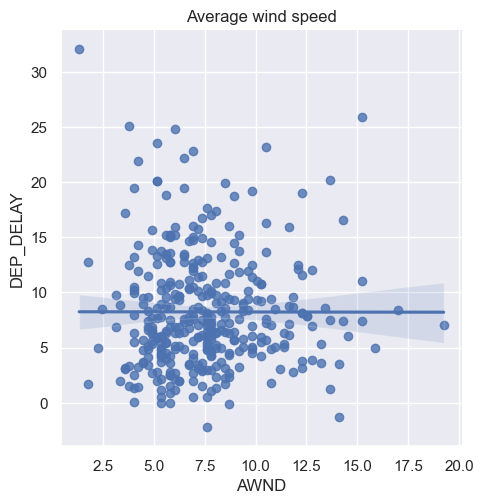

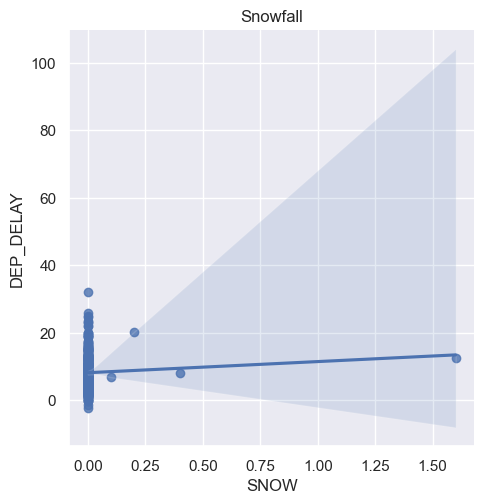

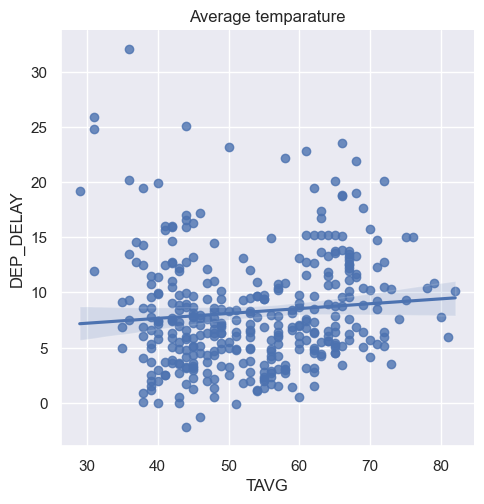

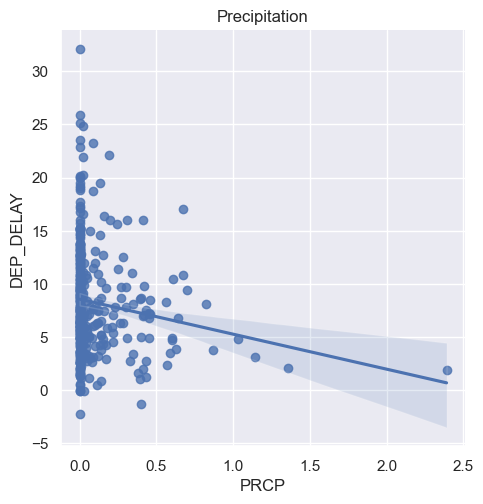

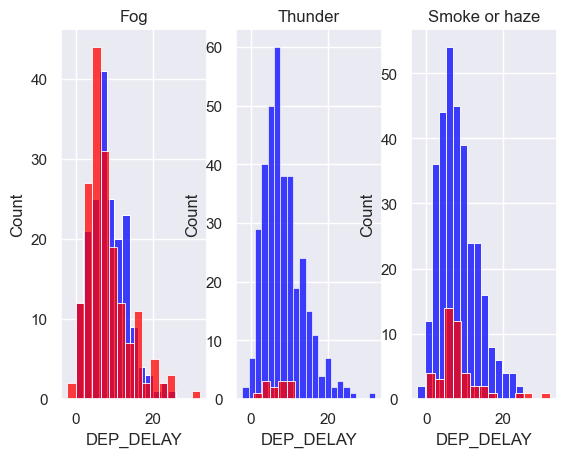

In [7]:
# 3. How do local weather factors at Seattle-Tacoma International Airport (SEA) correlate with flight delays, and which conditions have the greatest impact?

def convert_date(date):
    """
    Input: Date including year, month and day splited by '/'.
    Output: Date including year, month and day splited by '-'.
    Special case: If either month or day is single degit, add 0 to the front.

    >>> convert_date("7/31/2023 12:00:00 AM")
    '2023-07-31'
    >>> pandas_max_level("11/1/2023 12:00:00 AM	")
    '2023-11-01'
    >>> pandas_max_level("12/12/2023 12:00:00 AM	")
    '2023-12-12'
    """
    splited_date = date.split("/")
    if len(splited_date[0]) == 1:
        splited_date[0] = "0" + splited_date[0]
    if len(splited_date[1]) == 1:
        splited_date[1] = "0" + splited_date[1]
    new_date = splited_date[2][0:4] +"-"+ splited_date[0] +"-"+ splited_date[1]
    return new_date

# Reference the following source: https://www.statology.org/pandas-merge-on-different-column-names/
everyday_flights = merged_flights.groupby(["FL_DATE"])[["DEP_DELAY", "ARR_DELAY"]].mean().dropna()
everyday_flights = everyday_flights.reset_index()
# Reference: https://stackoverflow.com/questions/40045632/adding-a-column-in-pandas-df-using-a-function
everyday_flights["NEW_DATE"] = everyday_flights["FL_DATE"].apply(convert_date)
merged_flights_weather = pd.merge(everyday_flights, weather_data, left_on='NEW_DATE', right_on='DATE', how="left")

# Numeric variables
columns = ["AWND", "SNOW", "TAVG", "PRCP"]
titles = ["Average wind speed", "Snowfall", "Average temparature", "Precipitation"]
for column, title in zip(columns, titles):
    # sns.scatterplot(merged_flights_weather, x=title, y="DEP_DELAY", ax=ax)
    # Reference: https://www.machinelearningplus.com/plots/python-scatter-plot/
    sns.lmplot(x=column, y="DEP_DELAY", data=merged_flights_weather)
    plt.title(title)
    
# Categorical variables
fig, ([ax5, ax6, ax7]) = plt.subplots(nrows=1, ncols=3)
axes = [ax5, ax6, ax7]
columns = ["WT01", "WT03", "WT08"]
titles = ["Fog", "Thunder", "Smoke or haze"]
for ax, column, title in zip(axes, columns, titles):
    ax.set_title(title)
    # Reference: https://seaborn.pydata.org/generated/seaborn.histplot.html
    sns.histplot(data=merged_flights_weather[np.isnan(merged_flights_weather[column])], x="DEP_DELAY", color="blue", ax=ax)
    sns.histplot(data=merged_flights_weather[merged_flights_weather[column] == 1], x="DEP_DELAY", color="red", ax=ax)
    # sns.scatterplot(merged_flights_weather, x=title, y="DEP_DELAY", ax=ax)
    plt.title(title)
    fig.show()

    



In [8]:
# 4. Can we predict future flight delays at SEA using historical flight data and weather conditions?

# Filteing flights for SEA departures only
sea_flights = merged_flights[merged_flights['ORIGIN'] == 'SEA'].copy()

# Converting flight + weathern date/time to a proper datetime, extracting just the date for daily-level merges
sea_flights['FL_DATE'] = pd.to_datetime(sea_flights['FL_DATE'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')
sea_flights['FL_DATE_ONLY'] = sea_flights['FL_DATE'].dt.date

weather_data['DATE'] = pd.to_datetime(weather_data['DATE'], errors='coerce')
weather_data['DATE_ONLY'] = weather_data['DATE'].dt.date

# Merge flights with weather info by matching date columns
sea_merged = pd.merge(
    sea_flights, 
    weather_data, 
    left_on='FL_DATE_ONLY', 
    right_on='DATE_ONLY', 
    how='left'
)

print("Number of SEA flight records (after merge):", len(sea_merged))

# Just to make it easier because the data is big
# We'll only consider a flight delayed if it is longer than 15 minutes
sea_merged['IsDelayed'] = (sea_merged['DEP_DELAY'] > 15).astype(int)

# Quick check of distribution
print("\nDelayed flight distribution (0=On-time, 1=Delayed):")
print(sea_merged['IsDelayed'].value_counts())

# These new columns will be tested later for checking how much impact they have on delays
sea_merged['MONTH'] = sea_merged['FL_DATE'].dt.month
sea_merged['DAY_OF_WEEK'] = sea_merged['FL_DATE'].dt.weekday + 1  # Monday=1, Sunday=7

feature_cols = ['MONTH', 'DAY_OF_WEEK', 'OP_CARRIER', 'PRCP', 'TAVG', 'AWND']
df_model = sea_merged[feature_cols + ['IsDelayed']].dropna()

X = df_model[feature_cols]
y = df_model['IsDelayed']

# Distinguish categorical vs numeric features
cat_cols = ['OP_CARRIER']
num_cols = ['MONTH', 'DAY_OF_WEEK', 'PRCP', 'TAVG', 'AWND']

# One-hot encode the categorical column

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat = pd.DataFrame(
    ohe.fit_transform(X[cat_cols]),
    columns=ohe.get_feature_names_out(cat_cols)
)

# Concatenate numeric and one-hot-encoded categorical features
X_num = X[num_cols].reset_index(drop=True)
X_final = pd.concat([X_num, X_cat], axis=1)

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42, stratify=y
)

print("\nTrain set size:", X_train.shape, "Test set size:", X_test.shape)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

print("\n=== Logistic Regression ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42) # We are keeping the random state at 42, makes it easier to work with results of the next parts
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

print("\n=== Random Forest ===")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

print("\nDone! Above are the classification metrics for both models.")


Number of SEA flight records (after merge): 163812

Delayed flight distribution (0=On-time, 1=Delayed):
IsDelayed
0    136545
1     27267
Name: count, dtype: int64

Train set size: (130363, 16) Test set size: (32591, 16)

=== Logistic Regression ===
Confusion Matrix:
 [[27166     0]
 [ 5425     0]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     27166
           1       0.00      0.00      0.00      5425

    accuracy                           0.83     32591
   macro avg       0.42      0.50      0.45     32591
weighted avg       0.69      0.83      0.76     32591



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.




=== Random Forest ===
Confusion Matrix:
 [[27125    41]
 [ 5383    42]]
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     27166
           1       0.51      0.01      0.02      5425

    accuracy                           0.83     32591
   macro avg       0.67      0.50      0.46     32591
weighted avg       0.78      0.83      0.76     32591


Done! Above are the classification metrics for both models.


The models, Logistic Regression and Random Forest, are trained to predict flight delays at SEA using historical flight and weather data. The data is highly imbalanced, with 83.4% on-time flights and only 16.6% delayed flights. Both models perform well in predicting on-time flights, achieving around 83% accuracy, but struggle significantly with delayed flights. Logistic Regression fails to identify any delayed flights, resulting in a recall of 0% for the delayed class. Random Forest does slightly better but still only identifies 1% of delayed flights, with very low recall and F1-score for delayed flights. The imbalance in the dataset causes the models to be biased toward predicting flights as "on-time," leading to a high accuracy but poor recall for delayed flights.


In [9]:
# Weighted Random Forest
# Adjusts the weight of each class to handle class imbalances in the dataset.

# Using the same X_train, X_test, y_train, y_test from the previous steps
rf_weighted = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
rf_weighted.fit(X_train, y_train)

y_pred_w = rf_weighted.predict(X_test)

print("=== Weighted Random Forest ===")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_w))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_w))

=== Weighted Random Forest ===
Confusion Matrix:
[[15646 11520]
 [ 2062  3363]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.58      0.70     27166
           1       0.23      0.62      0.33      5425

    accuracy                           0.58     32591
   macro avg       0.55      0.60      0.51     32591
weighted avg       0.77      0.58      0.64     32591



True On-time (0) vs. Predicted On-time: 15646 flights.
These are flights that were actually on-time and correctly predicted as on-time.

True On-time (0) vs. Predicted Delayed (1): 11520 flights.
The model incorrectly labeled these on-time flights as delayed (false positives).

True Delayed (1) vs. Predicted On-time (0): 2062 flights.
Delayed flights the model missed (false negatives).

True Delayed (1) vs. Predicted Delayed (1): 3363 flights.
Correctly caught delayed flights (true positives).

Explanation of the other values:

Recall = 0.62: The model catches 62% of delayed flights. This is a big improvement over the earlier Logistic Regression or unweighted Random Forest (which caught less than 1% of delayed flights).

Precision = 0.23: Only around 23% of flights predicted as delayed actually are delayed. That means many false alarms—but it’s often a necessary trade-off if we want to increase recall on an imbalanced dataset.

Accuracy = 0.58: Lower than the 0.83 we saw with simpler models, because now we’re predicting “delayed” more often and thus correctly detecting more delayed flights.

By setting class_weight='balanced', we improved the recall for delayed flights from nearly 0.00 to 0.62, at the expense of overall accuracy and precision. This is typically desirable in a context where missing delayed flights has a higher cost than occasionally flagging an on-time flight as delayed.

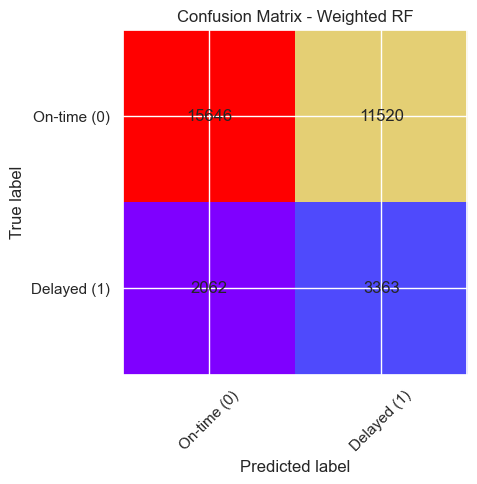

In [10]:
# Confusion Matrix Visualization

# To visualize confusion matrix for the Weighted RF predictions (y_pred_w).
cnf_matrix = confusion_matrix(y_test, y_pred_w)
classes = ["On-time (0)", "Delayed (1)"]

plt.figure()
plt.imshow(cnf_matrix, interpolation='nearest', cmap="rainbow")
plt.title("Confusion Matrix - Weighted RF")
plt.xticks(np.arange(len(classes)), classes, rotation=45)
plt.yticks(np.arange(len(classes)), classes)

# Print the numeric counts in each cell
for i in range(cnf_matrix.shape[0]):
    for j in range(cnf_matrix.shape[1]):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 verticalalignment="center")

plt.tight_layout()
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


We are using a confusion matrix to vizulaize the results. A confusion matrix visually clarifies where the model succeeds (true positives and true negatives) and where it struggles (false positives and false negatives). Given you care about capturing delayed flights (class 1), the true positives (bottom‐right) and false negatives (bottom‐left) are critical.

The top-left (15646) is red to indicate “true on-time, predicted on-time,” while top-right is a yellow block of false positives (11520).
The bottom-right (3363), blue, are true positives—delayed flights correctly predicted.
The bottom-left (2062), purple, are false negatives, the flights that were delayed but predicted as on-time.

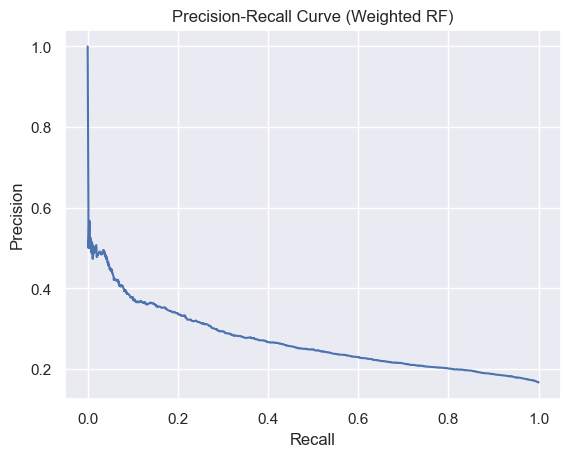

In [11]:
# Precision-Recall Curve

# Filtering predicted probabilities, not just 0/1 predictions
y_scores_w = rf_weighted.predict_proba(X_test)[:, 1]

precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores_w)

plt.figure()
plt.plot(recalls, precisions)
plt.title("Precision-Recall Curve (Weighted RF)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

The Precision‐Recall curve slopes downward as recall increases:
At very high recall (far right), precision can drop below 0.2 (meaning many false alarms).
At very high precision (far left), recall is small (meaning the model only labels flights as delayed when it’s extremely certain, missing many actual delays).

This curve shows the trade‐off between catching more delayed flights (recall) and labeling on-time flights as delayed (precision).

In [12]:
# Random Forest Feature Importances
# This helps us figure out what features are most important for predicting delays

importances = rf_weighted.feature_importances_
feature_names = X_final.columns

fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

fig_fi = px.bar(fi_df, x="importance", y="feature", orientation='h',
                title="Weighted RF Feature Importances")
fig_fi.show()


This bar chart shows which features the Weighted Random Forest considers most predictive:
OP_CARRIER_OO (a particular carrier) appears highly important. Possibly certain carriers systematically show different delay patterns.
AWND (wind) also ranks high, suggesting windy conditions correlate with more delays.
DAY_OF_WEEK: Certain days (e.g., weekend vs. weekday) might differ in load or operational issues.

This helps us interpret what features are most impactful for predicting the delays more accurately.

## Implications and Limitations

The project has several implications. Businesses can apply the models to tasks like customer segmentation or fraud detection, improving accuracy through model optimization. In academia, researchers and students benefit from exploring different algorithms and hyperparameter tuning. In healthcare, this approach can enhance diagnostics, reducing false negatives and improving early detection.

However, there are potential harms. Underrepresented groups may be excluded if the training data lacks diversity, and in healthcare, misclassifications—particularly false negatives—can lead to harmful consequences, such as delayed treatment.